### aim: SOCAT data

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [12]:
w = xr.open_dataset('/gpfs/data/greenocean/observations/SOCAT2023/SOCATv2023_tracks_gridded_monthly.nc')
w
yr = 2022
tco2 = w.fco2_ave_weighted.sel(tmnth=slice(f'{yr}-01-01', f'{yr+1}-01-01'))

tco2

<xarray.DataArray 'fco2_ave_weighted' (tmnth: 12, ylat: 180, xlon: 360)>
[777600 values with dtype=float32]
Coordinates:
  * xlon     (xlon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * ylat     (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * tmnth    (tmnth) datetime64[ns] 2022-01-16T12:00:00 ... 2022-12-16T12:00:00
Attributes:
    long_name:  fCO2 mean - per cruise weighted
    units:      uatm
    history:    From SOCAT_ABCD_data_for_gridding
    summary:    Mean of fco2 recomputed computed by calculating the arithmeti...

In [16]:
w

<xarray.Dataset>
Dimensions:                (bnds: 2, tmnth: 636, xlon: 360, ylat: 180)
Coordinates:
  * xlon                   (xlon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * ylat                   (ylat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * tmnth                  (tmnth) datetime64[ns] 1970-01-16T12:00:00 ... 202...
Dimensions without coordinates: bnds
Data variables:
    tmnth_bnds             (tmnth, bnds) datetime64[ns] ...
    count_ncruise          (tmnth, ylat, xlon) float64 ...
    fco2_count_nobs        (tmnth, ylat, xlon) float64 ...
    fco2_ave_weighted      (tmnth, ylat, xlon) float32 ...
    fco2_ave_unwtd         (tmnth, ylat, xlon) float32 ...
    fco2_min_unwtd         (tmnth, ylat, xlon) float32 ...
    fco2_max_unwtd         (tmnth, ylat, xlon) float32 ...
    fco2_std_weighted      (tmnth, ylat, xlon) float32 ...
    fco2_std_unwtd         (tmnth, ylat, xlon) float32 ...
    sst_count_nobs         (tmnth, ylat, xlon) float64 ...
    sst_ave_weighted       (tmnth, ylat, xlon) float32 ...
    sst_ave_unwtd          (tmnth, ylat, xlon) float32 ...
    sst_min_unwtd          (tmnth, ylat, xlon) float32 ...
    sst_max_unwtd          (tmnth, ylat, xlon) float32 ...
    sst_std_weighted       (tmnth, ylat, xlon) float32 ...
    sst_std_unwtd          (tmnth, ylat, xlon) float32 ...
    salinity_count_nobs    (tmnth, ylat, xlon) float64 ...
    salinity_ave_weighted  (tmnth, ylat, xlon) float32 ...
    salinity_ave_unwtd     (tmnth, ylat, xlon) float32 ...
    salinity_min_unwtd     (tmnth, ylat, xlon) float32 ...
    salinity_max_unwtd     (tmnth, ylat, xlon) float32 ...
    salinity_std_weighted  (tmnth, ylat, xlon) float32 ...
    salinity_std_unwtd     (tmnth, ylat, xlon) float32 ...
    lat_offset_unwtd       (tmnth, ylat, xlon) float32 ...
    lon_offset_unwtd       (tmnth, ylat, xlon) float32 ...
Attributes:
    history:      PyFerret V7.63 (optimized) 10-May-23
    Conventions:  CF-1.6
    title:        SOCAT gridded v2023 Monthly 1x1 degree gridded dataset
    summary:      Surface Ocean Carbon Atlas (SOCAT) Gridded (binned) SOCAT o...
    references:   http://www.socat.info/
    SOCAT_Notes:  SOCAT gridded v2023 11-May-2023
    caution:      NO INTERPOLATION WAS PERFORMED. SIGNIFICANT BIASES ARE PRES...

In [21]:
tco2.tmnth[0]

<xarray.DataArray 'tmnth' ()>
array('2022-01-16T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    tmnth    datetime64[ns] 2022-01-16T12:00:00
Attributes:
    axis:           T
    bounds:         tmnth_bnds
    time_origin:    01-JAN-1970
    standard_name:  time

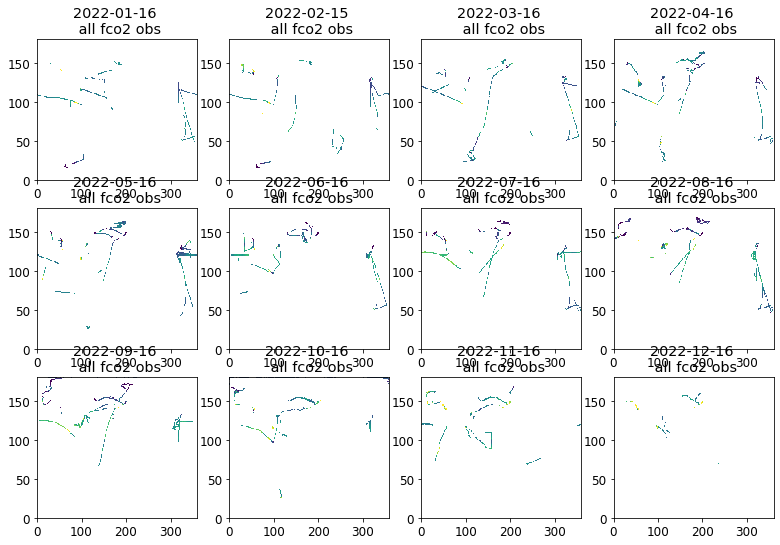

In [33]:
fact = 1.1
fig, axs = plt.subplots(3,4, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(0,12):
    axs[i].pcolormesh(tco2[i,:,:], vmin = 300, vmax = 500)
    cas = pd.to_datetime(tco2.tmnth[i].values).strftime('%Y-%m-%d')
    axs[i].set_title(f'{cas} \n all fco2 obs')
    
plt

In [32]:
cas = pd.to_datetime(tco2.tmnth[i].values).strftime('%Y-%m-%d')

'2022-12-16'